<a href="https://colab.research.google.com/github/nitin-khandagale/blogposts/blob/master/video_games_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import os
import plotly.graph_objs as go
from plotly.offline import iplot
import seaborn as sns

In [0]:
df = pd.read_csv('vgsales.csv')

In [0]:
df.isnull().sum()
df = df.dropna()

In [0]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [0]:
df.Genre.unique()
df['Genre'] = df['Genre'].apply(lambda x:"Sports" if x=='Racing' else x)
df['Genre'] = df['Genre'].apply(lambda x:"Action" if x=='Fighting' else x)
df['Genre'] = df['Genre'].apply(lambda x:"Misc" if x=='Puzzle' else x)
df['Genre'] = df['Genre'].apply(lambda x:"Action_Adventure" if x=='Action' or x=='Adventure' else x)

In [0]:
genre_list = df['Genre'].unique().tolist()
genre_list

['Sports',
 'Platform',
 'Role-Playing',
 'Misc',
 'Shooter',
 'Simulation',
 'Action_Adventure',
 'Strategy']

In [0]:
df_summed_gn = df.groupby(['Genre']) ['EU_Sales', 'NA_Sales', 'JP_Sales'].sum().reset_index()

trace = go.Figure(data=[
                        go.Bar(name='Europe', x=genre_list, y=df_summed_gn.EU_Sales, marker_color='lightslategray'),
                        go.Bar(name='North America', x=genre_list, y=df_summed_gn.NA_Sales, marker_color='indianred'),
                        go.Bar(name='Japan', x=genre_list, y=df_summed_gn.JP_Sales)
])
trace.update_layout(title='Genre wise Total sales')
iplot(trace)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [0]:
global_summed = df.groupby(df['Genre'])['Global_Sales'].sum().reset_index()

trace = go.Figure(data=[go.Bar(name='Global Sales', x=df['Genre'].unique().tolist(), y=global_summed.Global_Sales, marker_color='lightslategray')])
trace.update_layout(title='Genre Wise Global Sales')
iplot(trace)

In [0]:
fre = df['Platform'].value_counts()

df['Platform'] = df['Platform'].apply(lambda x:"Less than 100" if fre[x]<100 else x)

In [0]:
df['Platform'].unique()
platform = df['Platform'].unique().tolist()
platform

['Wii',
 'Less than 100',
 'DS',
 'X360',
 'PS3',
 'PS2',
 'SNES',
 'GBA',
 '3DS',
 'PS4',
 'N64',
 'PS',
 'XB',
 'PC',
 '2600',
 'PSP',
 'XOne',
 'GC',
 'WiiU',
 'PSV',
 'SAT']

In [0]:
df_summed_pl = df.groupby(['Platform']) ['EU_Sales','NA_Sales', 'JP_Sales'].sum().reset_index()

trace = go.Figure(data=[
                        go.Bar(name='Europe', x=platform, y=df_summed_pl.EU_Sales, marker_color='lightslategray'),
                        go.Bar(name='North America', x=platform, y=df_summed_pl.NA_Sales, marker_color='indianred'),
                        go.Bar(name='Japan', x=platform, y=df_summed_pl.JP_Sales)
])
trace.update_layout(title='Platform Sales')
iplot(trace)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<Figure size 1800x1440 with 0 Axes>

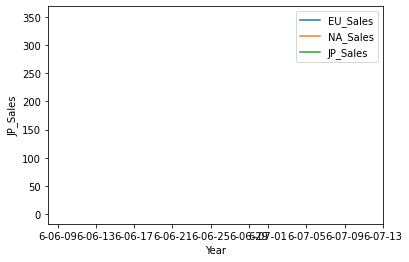

<Figure size 1800x1440 with 0 Axes>

In [0]:
df_year = df.groupby(['Year']) ['EU_Sales','NA_Sales', 'JP_Sales'].sum().reset_index()

ax = sns.lineplot(x=df['Year'], y=df_year.EU_Sales)
ax = sns.lineplot(x=df['Year'], y=df_year.NA_Sales)
ax = sns.lineplot(x=df['Year'], y=df_year.JP_Sales)
ax.set(xlim=(1985,2020))
ax.legend(['EU_Sales', 'NA_Sales', 'JP_Sales'])
plt.figure(figsize=(25,20))

In [0]:
df['Year'] = pd.to_datetime(df['Year'], format="%Y")

global_sum_year = df.groupby(['Year']) ['Global_Sales'].sum().reset_index()
fig = px.histogram(df, x='Year', y='Global_Sales', color_discrete_sequence=['skyblue'])
iplot(fig)

In [0]:
global_sum_pl = df.groupby(['Platform']) ['Global_Sales'].sum().reset_index()

trace = go.Figure(data=[
                        go.Bar(name='Global_Sales', x=df['Platform'].unique().tolist(), y=global_sum_pl.Global_Sales,
                               marker_color='pink')
])
trace.update_layout(title='Global sales by Platforms')
iplot(trace)